In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import networkx as nx

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm

# Lectura de datos

## Dataframe de Tesis

In [ ]:
DF_TESIS = pd.read_csv("df_thesis_all.csv", sep="|")
print(DF_TESIS.shape)
DF_TESIS.head()

(15320, 16)


,id,thesis_type,right,url,title,author,advisor,keywords,ocde,date,university,abstract,discipline,grade,juror,register_date
0,3161802,bachelorThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Análisis hidrogeológico conceptual y propuesta...,"Contreras Gutiérrez, Efrain Jhiaromir","Mogrovejo Gutiérrez, Rubén Esaú",Mecánica de suelos; Aguas subterráneas,"('https://purl.org/pe-repo/ocde/ford#2.03.01',)",2022,Universidad Nacional Mayor de San Marcos,Se realizó el estudio de mecánica de suelos y ...,Ingeniería Mecánica de Fluidos,Universidad Nacional Mayor de San Marcos. Facu...,"Serruto Colque, Arístides Ramón; Sarango Julca...",14-Jun-2022; 14-Jun-2022
1,3161807,doctoralThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,La regulación democrática del financiamiento p...,"Manrique Prialé, Roxana Marlene","Chanamé Orbe, Raúl Roosevelt",Jurado Nacional de Elecciones; Financiamiento;...,('https://purl.org/pe-repo/ocde/ford#5.06.01;\...,2022,Universidad Nacional Mayor de San Marcos,Define la relación que existe entre el financi...,Derecho y Ciencia Política,Universidad Nacional Mayor de San Marcos. Facu...,"Paiva Goyburu, Dante Martín; Paucar Chappa, Ma...",15-Jun-2022; 15-Jun-2022
2,3161831,masterThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Sistema de gestión de prevención de riesgos la...,"Godoy Martínez, Manuel Rómulo","Tinoco Gómez, Oscar Rafael",Sistemas de gestión; Seguridad y salud en el t...,"('https://purl.org/pe-repo/ocde/ford#2.11.04',)",2022,Universidad Nacional Mayor de San Marcos,Demostrar que implementar un plan para el sist...,Dirección de Empresas Industriales y de Servicios,Universidad Nacional Mayor de San Marcos. Facu...,"Rivera Poma, Juan Manuel; Inche Mitma, Jorge L...",17-Jun-2022; 17-Jun-2022
3,3161838,bachelorThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Análisis del uso de tecnologías de información...,"Briones Heras, Mauricio","Pantoja Collantes, Jorge Santiago",Elecciones - Innovaciones tecnológicas - Perú;...,"('https://purl.org/pe-repo/ocde/ford#2.02.04',)",2018,Universidad Nacional Mayor de San Marcos,Describe el uso de las TICs para abordar el pr...,Ingeniería de Sistemas,Universidad Nacional Mayor de San Marcos. Facu...,"Pró Concepción, Luzmila Elisa; Román Concha, N...",16-Jun-2022; 16-Jun-2022
4,3161822,bachelorThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Eficacia de los programas de rehabilitación en...,"Paucar Arellano, Catherine Isabel","Mendoza Correa, María Isabel del Milagro",Actividad motora; Pérdida auditiva; Rehabilita...,('https://purl.org/pe-repo/ocde/ford#3.05.03;\...,2022,Universidad Nacional Mayor de San Marcos,Sistematiza los artículos sobre la eficacia de...,Tecnología Médica en el área de Terapia Física...,Universidad Nacional Mayor de San Marcos. Facu...,"Garay Ugaz, Eduardo Martin; Gómez Gonzales, Wa...",3-Jun-2022; 3-Jun-2022


## Grafo de Tesis

In [ ]:
## lectura del grafo
G_TESIS = nx.read_graphml("g_tesis.graphml")
print(G_TESIS)

DiGraph with 15320 nodes and 278820 edges


In [ ]:
## vista de los atributos del nodo
i = 0
for n in G_TESIS.nodes():
    print(n, G_TESIS.nodes()[n])

    if i==5:
        break

    i += 1

3161802 {'title': 'Análisis hidrogeológico conceptual y propuesta de escenarios numéricos del interflujo para la presa de relaves ubicada en la ciudad de Castilla Arequipa-2022', 'year': 2022, 'university': 'Universidad Nacional Mayor de San Marcos', 'right': 'openAccess', 'discipline': 'Ingeniería Mecánica de Fluidos'}
3161807 {'title': 'La regulación democrática del financiamiento partidario en el Perú', 'year': 2022, 'university': 'Universidad Nacional Mayor de San Marcos', 'right': 'openAccess', 'discipline': 'Derecho y Ciencia Política'}
3161831 {'title': 'Sistema de gestión de prevención de riesgos laborales y la protección del trabajador en una empresa del sector gráfico y publicitario en Lima-Perú, 2021', 'year': 2022, 'university': 'Universidad Nacional Mayor de San Marcos', 'right': 'openAccess', 'discipline': 'Dirección de Empresas Industriales y de Servicios'}
3161838 {'title': 'Análisis del uso de tecnologías de información y comunicación en procesos electorales caso: Sist

In [ ]:
## vista de las aristas
i = 0
for v1, v2 in G_TESIS.edges():
    print(v1, "--->", v2)

    if i==5:
        break

    i += 1

3161802 ---> 2876202
3161802 ---> 2870655
3161802 ---> 2872473
3161802 ---> 3077016
3161802 ---> 2884775
3161802 ---> 2882918


In [ ]:
DF_TESIS[DF_TESIS["id"].isin([3161802, 2876202])]

,id,thesis_type,right,url,title,author,advisor,keywords,ocde,date,university,abstract,discipline,grade,juror,register_date
0,3161802,bachelorThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Análisis hidrogeológico conceptual y propuesta...,"Contreras Gutiérrez, Efrain Jhiaromir","Mogrovejo Gutiérrez, Rubén Esaú",Mecánica de suelos; Aguas subterráneas,"('https://purl.org/pe-repo/ocde/ford#2.03.01',)",2022,Universidad Nacional Mayor de San Marcos,Se realizó el estudio de mecánica de suelos y ...,Ingeniería Mecánica de Fluidos,Universidad Nacional Mayor de San Marcos. Facu...,"Serruto Colque, Arístides Ramón; Sarango Julca...",14-Jun-2022; 14-Jun-2022
4166,2876202,bachelorThesis,closedAccess,https://renati.sunedu.gob.pe/handle/sunedu/287...,Cálculo hidráulico y selección de electrobomba...,"Requena Zea, Lionel","Rozas Olivera, Guido Américo",Bombas hidráulicas; Abastecimiento de agua; Ma...,"('https://purl.org/pe-repo/ocde/ford#2.03.01',)",2016,Universidad Nacional Mayor de San Marcos,Realiza una evaluación del sistema de abasteci...,Ingeniería Mecánica de Fluidos,Universidad Nacional Mayor de San Marcos. Facu...,"Quispe Gonzáles, César Alejandro; Ormeño Valer...",10-Apr-2017; 10-Apr-2017


# Similaridad de Cosenos de Abstracts

In [ ]:
DF_ABSTRACTS = DF_TESIS[["id", "abstract"]].copy()
print(DF_ABSTRACTS.shape)
DF_ABSTRACTS.head()

(15320, 2)


,id,abstract
0,3161802,Se realizó el estudio de mecánica de suelos y ...
1,3161807,Define la relación que existe entre el financi...
2,3161831,Demostrar que implementar un plan para el sist...
3,3161838,Describe el uso de las TICs para abordar el pr...
4,3161822,Sistematiza los artículos sobre la eficacia de...


In [ ]:
vectorizer = TfidfVectorizer(max_features=100)
vectorizer

TfidfVectorizer(max_features=100)

In [ ]:
vectors = vectorizer.fit_transform(DF_ABSTRACTS["abstract"])
vectors

<15320x100 sparse matrix of type '<class 'numpy.float64'>'
	with 453677 stored elements in Compressed Sparse Row format>

In [ ]:
DF_ABSTRACTS["vector"] = vectors.toarray().tolist()
DF_ABSTRACTS.head()

,id,abstract,vector
0,3161802,Se realizó el estudio de mecánica de suelos y ...,"[0.0, 0.0, 0.0, 0.12102550319922621, 0.0, 0.0,..."
1,3161807,Define la relación que existe entre el financi...,"[0.0, 0.037584925581878995, 0.0, 0.02665788415..."
2,3161831,Demostrar que implementar un plan para el sist...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3161838,Describe el uso de las TICs para abordar el pr...,"[0.0, 0.05088177003141426, 0.0, 0.072177890999..."
4,3161822,Sistematiza los artículos sobre la eficacia de...,"[0.1094046024291366, 0.057809253274903785, 0.0..."


## Adición del atributo de ponderación a las aristas

In [ ]:
for v1, v2 in tqdm(G_TESIS.edges()):
    vector_v1 = list(DF_ABSTRACTS[DF_ABSTRACTS["id"]==int(v1)]["vector"].values)
    vector_v2 = list(DF_ABSTRACTS[DF_ABSTRACTS["id"]==int(v2)]["vector"].values)

    G_TESIS[v1][v2]["weight"] = round(cosine_similarity(vector_v1, vector_v2)[0][0], 2)

100%|██████████| 278820/278820 [06:29<00:00, 715.93it/s]


In [ ]:
## visualización de las aristas
i = 0
for n in G_TESIS.nodes():
    print(n, G_TESIS[n])

    if i == 5:
        break

    i += 1

3161802 {'2876202': {'weight': 0.72}, '2870655': {'weight': 0.69}, '2872473': {'weight': 0.86}, '3077016': {'weight': 0.7}, '2884775': {'weight': 0.71}, '2882918': {'weight': 0.81}}
3161807 {'2873645': {'weight': 0.81}, '2875743': {'weight': 0.77}, '3445759': {'weight': 0.77}}
3161831 {'2868178': {'weight': 0.63}, '2872422': {'weight': 0.7}, '3133652': {'weight': 0.67}, '3325673': {'weight': 0.71}, '3409146': {'weight': 0.7}, '3161804': {'weight': 0.66}, '2865867': {'weight': 0.73}, '2872827': {'weight': 0.59}, '3423822': {'weight': 0.58}, '3356307': {'weight': 0.68}, '3152452': {'weight': 0.63}, '3370749': {'weight': 0.69}, '3400414': {'weight': 0.67}, '3403693': {'weight': 0.67}, '3405895': {'weight': 0.59}}
3161838 {'3431102': {'weight': 0.58}, '2876461': {'weight': 0.57}, '2877349': {'weight': 0.69}, '2878003': {'weight': 0.32}, '3400046': {'weight': 0.69}, '3400048': {'weight': 0.36}, '2884422': {'weight': 0.59}, '2863701': {'weight': 0.59}, '2874803': {'weight': 0.67}, '2871483':

In [ ]:
nx.write_graphml(G_TESIS, "g_tesis_weighted.graphml")

# Visualización del grafo

In [ ]:
nodos_2022 = [n for n, attr in G_TESIS.nodes(data=True) if attr['year'] == 2022]
print(nodos_2022[0:10])
len(nodos_2022)

['3161802', '3161807', '3161831', '3161822', '3161798', '3161846', '3161844', '3161860', '3161850', '3161820']


1235

In [ ]:
SUB_G = G_TESIS.subgraph(nodos_2022)
print(SUB_G)

DiGraph with 1235 nodes and 4110 edges


In [ ]:
pos = nx.spring_layout(SUB_G)
print(pos)
len(pos)

{'3146643': array([ 0.86231357, -0.11087643]), '3291008': array([-0.44028145, -0.91940683]), '3356255': array([-0.36397922, -0.76281989]), '3101388': array([0.39361033, 0.43683425]), '3238998': array([-0.54139143,  0.74015307]), '3107556': array([0.65003675, 0.54359961]), '3356359': array([-0.59582967, -0.04406961]), '3328749': array([-0.43394768,  0.12259583]), '3137543': array([-0.31458622, -0.66356385]), '3121724': array([-0.18829024,  0.50148994]), '3491814': array([0.68567568, 0.43870586]), '3229877': array([-0.89458758,  0.13190936]), '3238997': array([ 0.88206255, -0.42743498]), '3297592': array([-0.79740393,  0.51272202]), '3125748': array([-0.30665961, -0.10347752]), '3078629': array([0.05684026, 0.91047198]), '3101488': array([0.67507654, 0.05070258]), '3146926': array([ 0.79210573, -0.5069018 ]), '3351501': array([-0.83402354, -0.61159295]), '3356375': array([-0.90098059, -0.04586062]), '3080430': array([0.4658038, 0.6750139]), '3101426': array([-0.49245042, -0.75836247]), '

1235

In [ ]:
weights = nx.get_edge_attributes(SUB_G, "weight")
print(weights)
print(len(weights))

list_weights = [weights[e] for e in SUB_G.edges()]
print(list_weights)
print(len(list_weights))

print("--------------------------------------------------------------")
print("Listas con un peso mayor a 0.7")
list_top_edges = [w for w in weights if weights[w] >= 0.7]
print(list_top_edges)
print(len(list_top_edges))

list_top_weights = [weights[w] for w in weights if weights[w] >= 0.7]
print(list_top_weights)
print(len(list_top_weights))

{('3356255', '3291001'): 0.9, ('3101388', '3408878'): 0.65, ('3101388', '3356274'): 0.8, ('3101388', '3206718'): 0.74, ('3101388', '3356368'): 0.65, ('3356359', '3399512'): 0.75, ('3356359', '3356248'): 0.71, ('3356359', '3356312'): 0.72, ('3356359', '3370752'): 0.71, ('3356359', '3356386'): 0.68, ('3328749', '3327276'): 0.82, ('3328749', '3351446'): 0.73, ('3328749', '3156275'): 0.63, ('3137543', '3321015'): 0.59, ('3121724', '3121713'): 0.77, ('3121724', '3105386'): 0.56, ('3121724', '3326383'): 0.61, ('3121724', '3327008'): 0.67, ('3121724', '3327006'): 0.64, ('3121724', '3328747'): 0.58, ('3121724', '3327273'): 0.69, ('3121724', '3326390'): 0.7, ('3121724', '3327275'): 0.63, ('3121724', '3328740'): 0.65, ('3121724', '3121727'): 0.65, ('3121724', '3124480'): 0.7, ('3121724', '3326395'): 0.65, ('3121724', '3327011'): 0.64, ('3121724', '3111121'): 0.58, ('3121724', '3121704'): 0.69, ('3121724', '3122296'): 0.59, ('3121724', '3122771'): 0.6, ('3121724', '3368357'): 0.55, ('3121724', '3

In [ ]:
min(list_weights), max(list_weights), np.mean(list_weights)

(0.0, 0.93, 0.6731970802919707)

## Histograma de los Pesos

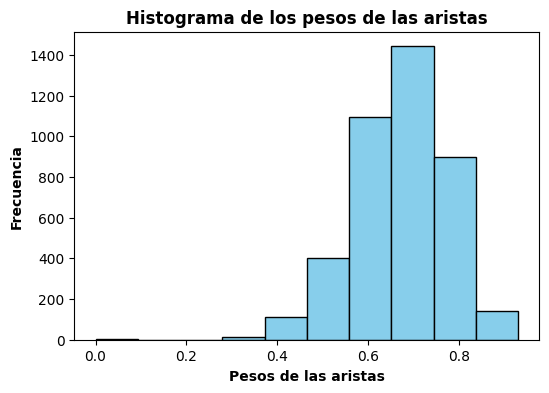

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(list_weights, bins=10, color="skyblue", edgecolor="black")

plt.xlabel("Pesos de las aristas", weight="bold")
plt.ylabel("Frecuencia", weight="bold")
plt.title("Histograma de los pesos de las aristas", weight="bold")

plt.show()

## Ploteo del grafo

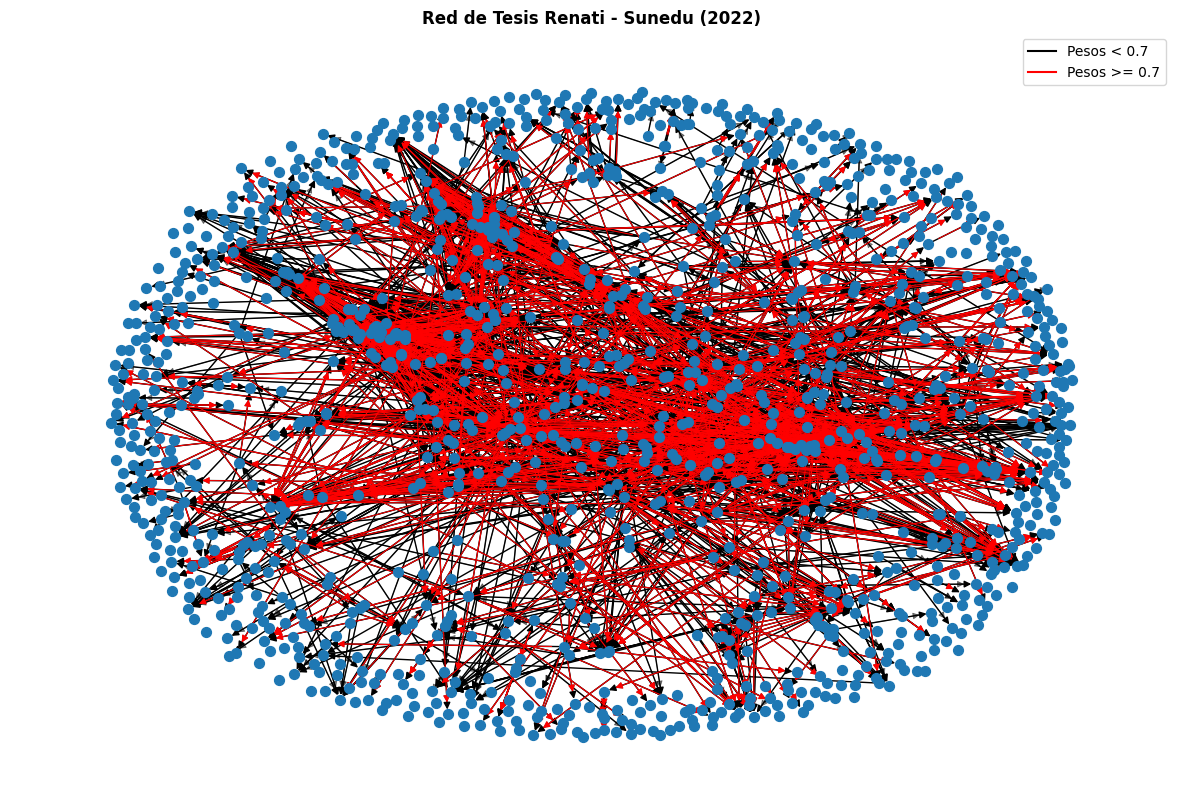

In [ ]:
plt.figure(figsize=(15, 10))
plt.axis("off")

nx.draw(SUB_G, pos, node_size=50)
nx.draw_networkx_edges(SUB_G, pos, edge_color="black", alpha=0.5, width=list_weights)
nx.draw_networkx_edges(SUB_G, pos, edge_color="red", edgelist=list_top_edges, width=list_top_weights)
#nx.draw_networkx_edge_labels(SUB_G, pos, edge_labels=weights)

## legenda personalizada
custom_legend = [
    Line2D([0], [0], color="black", ls="-", linewidth=1.5),
    Line2D([0], [0], color="red", ls="-", linewidth=1.5),
]

plt.legend(custom_legend, ["Pesos < 0.7", "Pesos >= 0.7"], loc="upper right")
plt.title("Red de Tesis Renati - Sunedu (2022)", weight="bold")
plt.show()